# Stationary scattering state for electron on one-dimensional constant barrier 

Created on Thu Feb  9 19:13:48 2017
@author: Sabot Frédéric (and other students)
tested on Python 3.4

Modified on Tue Nov 7 2017
@author: Jean-Marc Sparenberg
bugs corrected, unit definition based on scipy.constants, E=V_0 added

## Library import

In [1]:
import numpy as np #import sinh, cosh, exp, linspace, array, zeros, angle, pi # for numerical calculations
import scipy.constants as cst # for physical constants, type help(cst) for details
import matplotlib.pyplot as plt # for plotting
import matplotlib.cm as cm # color maps for complex numbers
from matplotlib.widgets import Slider # interactive slider in graph

## Physical parameters

In [2]:
h2m = cst.hbar**2/2/cst.m_e/cst.e*1e18
print ('hbar^2/2m_e = ', h2m, 'eV nm^2 \n')

E = 1
print ('electron energy =', E, 'eV')
k = np.sqrt(E/h2m)
print ('electron wave number =', k, 'nm^-1 \n')

V_0 = 1
print ('initial barrier height =', V_0, 'eV')
a_0 = 2
print ('initial barrier width =', a_0, 'nm')

hbar^2/2m_e =  0.03809982080226885 eV nm^2 

electron energy = 1 eV
electron wave number = 5.12316724383 nm^-1 

initial barrier height = 1 eV
initial barrier width = 2 nm


## Graph update

In [3]:
def grupdate(V_0, a):
     
     ax.clear()
     ax2.clear()
     
     ax.set_title('Electron scattering state on 1D constant barrier')
     ax.set_xlabel('$x$ (nm)', fontsize=16)
     ax.set_ylabel('$V$ (eV)', fontsize=16)
     ax2.set_ylabel('$|\psi|$ (nm$^{-1/2}$)', fontsize=16)
        
     xm = 4
     ax.set_xlim((-xm, xm + a))
     ax.set_ylim(-1, 3)
     ax2.set_ylim(-1, 3)
          
     barrier = [-xm, 0, 0, a, a, xm+a]
     barrier_high = [0, 0, V_0, V_0, 0, 0]
     
     ax.plot(barrier, barrier_high, 'k', lw=2.5)
     
     if V_0 == 0 :
          K = k
          T = 1
          R = 0
          A = 1
          B = 0
          
     elif E < V_0 :
          K = np.sqrt((V_0-E)/h2m)
          T = np.exp(-1j*k*a)*2*k*K/(2*k*K * np.cosh(K*a) + 1j * (K**2-k**2) * np.sinh(K*a))
          R = -1j * T * np.exp(1j*k*a) * (k**2+K**2) * np.sinh(K*a) / (2*k*K)
          A = 1j * k * (1-R) / K
          B = 1 + R     
          
     elif E == V_0 :
          T = np.exp(-1j*k*a)*2*k/(2*k - 1j * k**2 * a)
          R = -1j * T * np.exp(1j*k*a) * k**2 * a/2/k
          A = 1j * k * (1-R)
          B = 1 + R     

     else :
          K = np.sqrt((E-V_0)/h2m)
          K2 = K/k
          v1 = np.exp(1j*K*a)/np.exp(1j*k*a)
          v2 = np.exp(-1j*K*a)/np.exp(1j*k*a)
          A = -2 * v2 * (1+K2)/(v1*(1-K2)**2-v2*(1+K2)**2)
          B = (2-A*(1+K2))/(1-K2)
          R = A + B - 1
          T = A*v1 + B*v2
     
     ax.text(3.5, 2,' $E$ = {} eV \n $R^2$ = {} \n $T^2$ = {}'.format(E, round(abs(R)**2*1000)/1000, round(abs(T)**2*1000)/1000),
                  fontsize=16, bbox={'alpha':0.1, 'pad':10})
     
     x = np.linspace(-xm, xm + a, 500)
     
     z = []
     for v in x :
          if v < 0 :
               z.append(np.exp(1j*k*v) + R*np.exp(-1j*k*v))
          elif 0 < v < a:
               if E < V_0 :
                    z.append(A*np.sinh(K*v) + B*np.cosh(K*v))
               elif E == V_0 :
                    z.append(A*v + B)
               else :
                    z.append(A*np.exp(1j*K*v) + B*np.exp(-1j*K*v))                    
          else :
               z.append(T*np.exp(1j*k*v))

     X = np.array([x,x])
     
     y0 = np.zeros(len(x))
     y = [abs(i) for i in z]
     Y = np.array([y0,y])
     
     Z = np.array([z,z])
     C = np.angle(Z)
     
     ax.plot(x, y, 'k')     
     ax.pcolormesh(X, Y, C, cmap=cm.hsv, vmin=-np.pi, vmax=np.pi)

## Interactive window

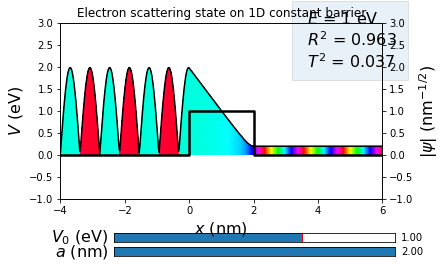

In [4]:
fig = plt.figure()

fig.subplots_adjust(bottom=0.27, right=0.87)

V_slider_ax  = fig.add_axes([0.25, 0.12, 0.65, 0.03])
V_slider = Slider(V_slider_ax, '$V_0$ (eV)', -1, 2, valinit=V_0)
V_slider.label.set_size(16)

a_slider_ax = fig.add_axes([0.25, 0.07, 0.65, 0.03])
a_slider = Slider(a_slider_ax, '$a$ (nm)', 0.01, 2, valinit=a_0)
a_slider.label.set_size(16)

ax = fig.add_subplot(111)
ax2 = ax.twinx()

grupdate(V_0, a_0)

def sliders_on_changed(val):
    grupdate(V_slider.val, a_slider.val)
    
V_slider.on_changed(sliders_on_changed)
a_slider.on_changed(sliders_on_changed)

#%matplotlib inline
#%matplotlib widgets qt tk notebook #nothing seems to work!
plt.show()